<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0305_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터분석 기초반 1주차 과제
- mpg 데이터를 가지고 간단한 전처리를 진행해 주세요.
- 데이터를 추출할 질문을 정하고 -> 코드를 작성하고 -> 주석을 작성하고 -> 결론을 도출!
- ex) 아우디의 차량의 개수와, 아우디 차량의 고속도로 연비는? ( 먼저 데이터를 보고 본인이 질문을 하고 그걸 코드로 작성)
- 질문은 최소 5개

**mpg 데이터 확인**

In [1]:
# 데이터 불러오기
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

mpg = pd.read_csv('/content/drive/My Drive/mpg.csv')
mpg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [2]:
# 데이터 타입 확인
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


**Q1. 카테고리의 종류는 총 몇 개이며, 어떤 카테고리가 가장 많은가?**

In [3]:
# 카테고리의 종류 확인
category_cnt = mpg['category'].value_counts()
category_cnt

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: category, dtype: int64

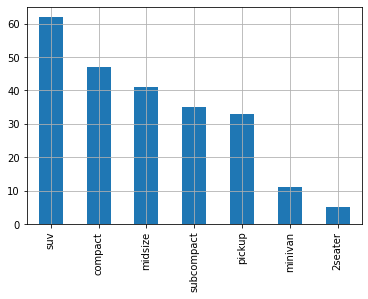

In [4]:
# 그래프를 통해 카테고리 종류별 개수 비교
import matplotlib.pyplot as plt

category_cnt.plot(kind='bar')
plt.grid()
plt.show()

=> 카테고리의 종류는 총 7개이며, suv가 가장 많은 것을 확인할 수 있다.

**Q2. 아우디는 어떤 카테고리로 구성되어 있을까?**

In [5]:
# manufacturer가 audi일 때, category 개수 확인하기 
mpg[mpg['manufacturer']=='audi']['category'].value_counts().reset_index()

,index,category
0,compact,15
1,midsize,3


=> 아우디는 compact와 midsize 두 종류가 있음을 알 수 있다.

**Q3. 자동차 배기량(displ)에 따라 고속도로 연비(hwy) 차이가 존재할까?**

<AxesSubplot:>

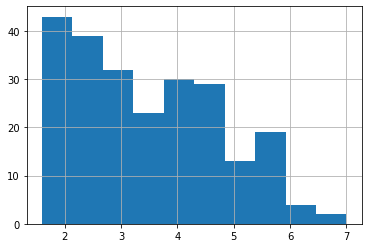

In [6]:
# 배기량 데이터 그래프로 확인
mpg['displ'].hist()

In [7]:
#  위 그래프를 통해 배기량의 분포도를 확인할 수 있다.
#  배기량 4를 기준으로 두고 연비 차이 확인
print(mpg[mpg['displ']<=4]['hwy'].mean())
print(mpg[mpg['displ']>4]['hwy'].mean())


25.96319018404908
17.64788732394366


=> 상대적으로 배기량이 적을수록 연비가 올라감을 알 수 있다.

**Q4. 어떤 자동차 제조회사가 가장 도시 연비가 좋을까?**

In [8]:
# 각 제조회사별 도시 연비 평균을 구한다
cty_mean = mpg.groupby('manufacturer')['cty'].mean().reset_index()
cty_mean

,manufacturer,cty
0,audi,17.611111
1,chevrolet,15.000000
2,dodge,13.135135
3,ford,14.000000
4,honda,24.444444
5,hyundai,18.642857
6,jeep,13.500000
7,land rover,11.500000
8,lincoln,11.333333
9,mercury,13.250000


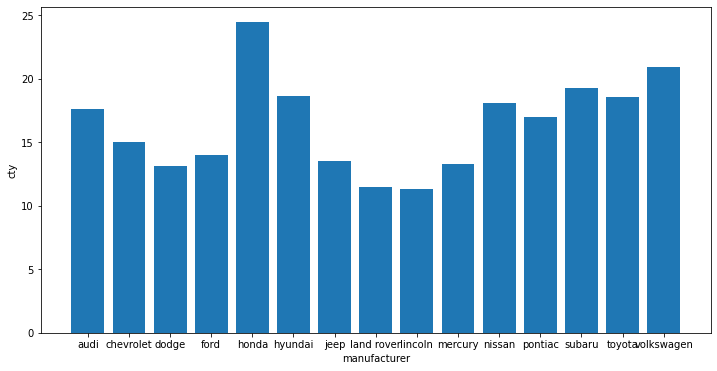

In [9]:
# 그래프로 한 눈에 도시 연비 평균을 비교한다
plt.figure(figsize=(12,6))
plt.bar(cty_mean['manufacturer'], cty_mean['cty'])
plt.xlabel('manufacturer')
plt.ylabel('cty')
plt.show()

=> 평균적으로 Honda가 가장 좋은 도시 연비를 가지고 있음을 알 수 있다.

**Q5. suv 중 도시 연비가 가장 좋은 제조사는 어디인가?**

In [11]:
# manufacturer, category, cty 열 추출하기
manufacturer_frm = mpg[['manufacturer', 'category', 'cty']]
manufacturer_frm

,manufacturer,category,cty
0,audi,compact,18
1,audi,compact,21
2,audi,compact,20
3,audi,compact,21
4,audi,compact,16
...,...,...,...
229,volkswagen,midsize,19
230,volkswagen,midsize,21
231,volkswagen,midsize,16
232,volkswagen,midsize,18


In [16]:
# 이 중 category가 suv인 것만 추출하기
suv_frm = manufacturer_frm[manufacturer_frm['category']=='suv'].reset_index(drop=True)
suv_frm

,manufacturer,category,cty
0,chevrolet,suv,14
1,chevrolet,suv,11
2,chevrolet,suv,14
3,chevrolet,suv,13
4,chevrolet,suv,12
...,...,...,...
57,toyota,suv,15
58,toyota,suv,16
59,toyota,suv,14
60,toyota,suv,11


In [17]:
# 제조사별 연비 평균 구하기
suv_manu_frm = suv_frm.groupby('manufacturer').mean()
suv_manu_frm

,cty
manufacturer,
chevrolet,12.666667
dodge,11.857143
ford,12.888889
jeep,13.500000
land rover,11.500000
lincoln,11.333333
mercury,13.250000
nissan,13.750000
subaru,18.833333


In [20]:
# 상위 3개의 제조업체만 불러오기
suv_manu_frm.sort_values(by='cty', ascending=False).head(3)

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000


=> suv 중 가장 도시 연비가 좋은 제조업체는 Subaru임을 알 수 있다.